In [239]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

The value of C: -0.01271660997587909 and sigma: 0.03491231584505789
Estimated probability: 0.0026997960632601965


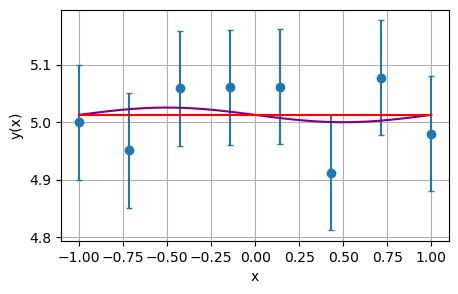

In [318]:
N = 8
mu = 5
sigma = 0.1
x_model = np.linspace(-1, 1, N)
b_model = np.random.normal(mu, sigma, N)


def funcBackground(x, A):
    if isinstance(x, int) or isinstance(x, float):
        return A
    else:
        return A * np.ones(len(x))


def funcBackgroundSignal(x, B, C):
    return B + C * np.sin(np.pi * x)


b_params, b_covariance = curve_fit(funcBackground, x_model, b_model)
A_est = b_params[0]

bs_params, bs_cov = curve_fit(funcBackgroundSignal, x_model, b_model)
C_est = bs_params[1]
B_est = bs_params[0]
sigma_C = np.sqrt(bs_cov[1, 1])

print(f"The value of C: {C_est} and sigma: {sigma_C}")
prob = stats.norm.cdf(-3 * sigma_C, 0, sigma_C) + (
    1 - stats.norm.cdf(3 * sigma_C, 0, sigma_C)
)
print(f"Estimated probability: {prob}")


x = np.linspace(-1, 1, 100)
b_values = funcBackground(x, A_est)
bs_values = funcBackgroundSignal(x, B_est, C_est)

plt.figure(figsize=(5, 3))
plt.errorbar(x_model, b_model, yerr=sigma, fmt="o", capsize=2)
plt.plot(x, bs_values, color="purple")
plt.plot(x, b_values, color="red")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.show()

In [359]:
iterations = 1000
count = 0

N = 8
mu = 5
sigma = 0.1
x_model = np.linspace(-1, 1, N)


def funcBackgroundSignal(x, B, C):
    return B + C * np.sin(np.pi * x)


C_test = []
C_test_std = []

for _ in range(iterations):
    # data = np.random.uniform(mu - np.sqrt(3) * sigma, mu + np.sqrt(3) * sigma, N)
    mc_data = np.random.normal(mu, sigma, N)

    bs_params, bs_cov = curve_fit(funcBackgroundSignal, x_model, mc_data)
    C_sim = bs_params[1]
    C_test.append(C_sim)
    sigma_C_sim = np.sqrt(bs_cov[1, 1])
    C_test_std.append(sigma_C_sim)

    if abs(C_sim) > 3 * sigma_C_sim:
        count += 1

prob_sim = count / iterations
print(prob_sim)

0.025
